In [1]:
import fashionmnist.utils.mnist_reader as mnist_reader
from MLP.main import ThreeLayerNet
from MLP.common.optimizers import SGD, Adam
from MLP.common.np import *
from MLP.common.trainer import Trainer

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats("svg")


cacheDir = "./cache"

X_train_org, y_train_org = mnist_reader.load_mnist(
    "./fashionmnist/data/fashion", kind="train"
)
X_test, y_test = mnist_reader.load_mnist("./fashionmnist/data/fashion", kind="t10k")

# shuffle the training set
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train_org, y_train_org = X_train_org[shuffle_index], y_train_org[shuffle_index]

# get 5000 samples from training set for validation
X_val, y_val = X_train_org[55000:, :], y_train_org[55000:]
X_train, y_train = X_train_org[:55000, :], y_train_org[:55000]

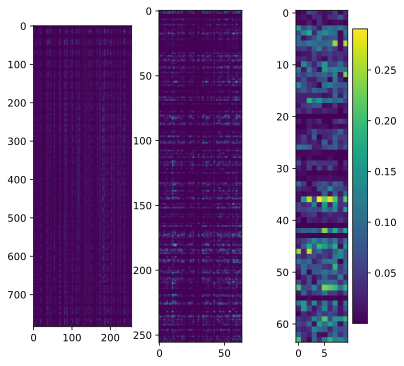

In [6]:
model_settings = {
    "input_size": 28 * 28,
    "hidden_size1": 256,
    "hidden_size2": 64,
    "output_size": 10,
}

model = ThreeLayerNet(**model_settings)
model.load_parameters("./cache/best_accuracy.pkl")
model.plot_weights()

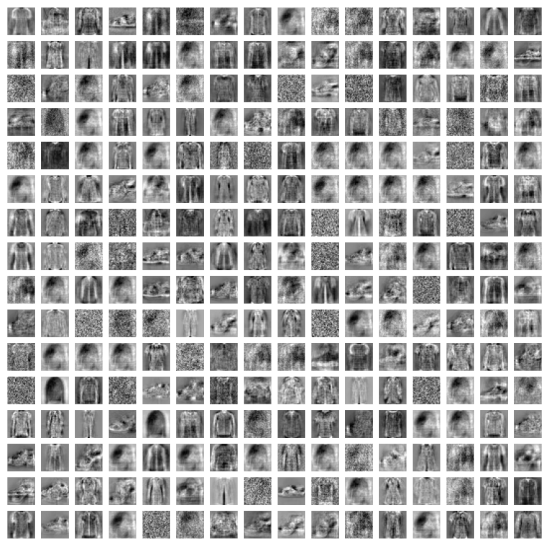

In [7]:
model.visualize_weights()

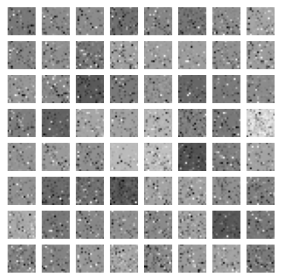

In [8]:
model.visualize_weights(if_first_layer=False)

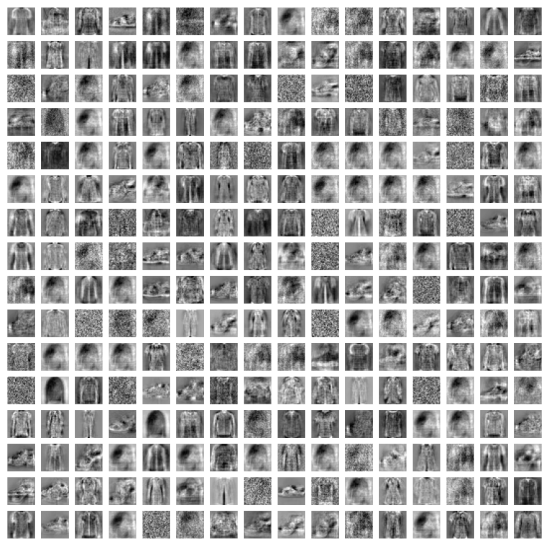

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math


def visualize_weights(model):
    # Get the weights of the first layer
    weights = model.layers[0].params[0]

    # Get the number of neurons in the first layer
    num_neurons = weights.shape[1]

    # Calculate the number of rows and columns for the grid
    grid_size = math.isqrt(num_neurons)
    if grid_size * grid_size < num_neurons:
        grid_size += 1

    # Create a new figure with a grid layout
    fig, axs = plt.subplots(
        grid_size, grid_size, figsize=(grid_size * 0.6, grid_size * 0.6)
    )

    for i in range(grid_size * grid_size):
        ax = axs[i // grid_size, i % grid_size]

        if i < num_neurons:
            # Reshape the weights of the i-th neuron to be 28x28
            neuron_weights = weights[:, i].reshape(28, 28)

            # Display the weights of the i-th neuron as an image
            ax.imshow(neuron_weights, cmap="gray")

            # Add a title
            # ax.set_title(f"Neuron {i+1}")
        else:
            # Hide the axes for the extra subplots
            ax.axis("off")

        # Remove the axis labels
        ax.axis("off")

    # Show the figure
    plt.show()


# Call the function to visualize the weights
visualize_weights(model)

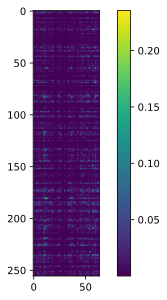

In [4]:
from MLP.common.layers import Affine

# plot weight matrix
plt.imshow(np.abs(model.layers[2].params[0]))

# add colorbar to the figure
plt.colorbar()

# save image
plt.savefig("figs/weight_layers.svg")

plt.show()

In [ ]:
trainer_settings = {
    "X_train": X_train,
    "y_train": y_train,
    "X_test": X_val,
    "y_test": y_val,
}
fit_settings = {
    "verbose": True,
    "max_epoch": 20,
}


# hidden_sizes = [64, 128, 256]
# lrs = [0.01, 0.001, 0.0001]
# l2_regs = [0.0001, 0.001, 0.01]

hidden_size1 = 256
hidden_size2 = 64
lrs = [0.001]
l2_regs = [0.001]
# l2_regs = [0]

best_params = None
highest_accuracy = 0

# 遍历所有参数组合
for lr in lrs:
    for l2_reg in l2_regs:
        # 更新参数设置
        model_settings = {
            "input_size": 28 * 28,
            "hidden_size1": hidden_size1,
            "hidden_size2": hidden_size2,
            "output_size": 10,
        }

        optimizer_settings = {
            "lr": lr,
            "l2_reg": l2_reg,
        }

        # 创建并训练模型
        model = ThreeLayerNet(**model_settings)
        optimizer = SGD(**optimizer_settings)

        trainer = Trainer(model, optimizer, **trainer_settings)
        trainer.fit(**fit_settings)

        # 如果这个模型的准确率更高，就更新最佳参数和最高准确率
        if trainer.accuracy["test"][-1] > highest_accuracy:
            highest_accuracy = trainer.accuracy["test"][-1]
            best_params = {
                "hidden_size1": hidden_size1,
                "hidden_size2": hidden_size2,
                "lr": lr,
                "l2_reg": l2_reg,
            }

print("Best params:", best_params)

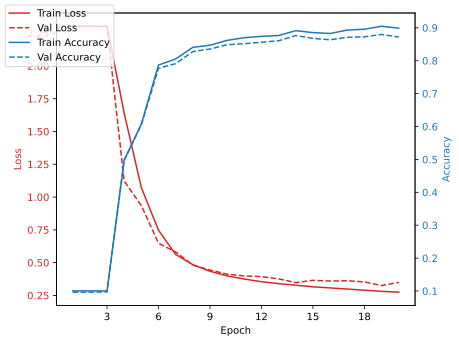

In [ ]:
trainer.plot(save=True)

In [ ]:
(model.compute_accuracy(X_train, y_train), model.compute_accuracy(X_test, y_test))

(0.8988, 0.867)